In [75]:
def extract_html(url):
    page = urlopen(url)
    html_bytes = page.read()
    html = html_bytes.decode("utf-8")
    return html

In [76]:
import re
from urllib.request import urlopen

pattern1= 'hreflang="en">(.*?)</a>'
songs_titles=[]
for i in range(0,9):
    url = 'https://www.thebeatles.com/songs?page='+str(i)
    html=extract_html(url)
    a=re.findall(pattern1,html)
    for el in a:
        el=el.replace('&#039;', '\'')
        songs_titles.append(el)
songs_titles[0:10]

['12-Bar Original',
 '1822!',
 'A Beginning',
 'A Day In The Life',
 "A Hard Day's Night",
 'A Little Rhyme',
 'A Shot Of Rhythm And Blues',
 'A Taste Of Honey',
 'Across The Universe',
 'Act Naturally']

In [80]:
import urllib.request as urllib2

remove_list=[' a ',' in ',' the ',' of ',' to ',' is ',' at ',' for ',' that ',' by ',' as ',' from ',' into ',
             ' on ',' with ',' off ',' this ',' up ',' like ']
remove_list_start=['a-','in-','the-','of-','to-','is-','at-','for-','that-','by-','as-','from-','like-','this-',
                  'with-']
remove_list_end=['-by','-to','-on','-is','-that','-before']
remove_list2=['\'','.','!','(',')',',','/',':']

pattern6='<div class="col-md-6 middle-content border-left border-right"><p>'
pattern7='<figure class="wp-block-table table-expander table table-imported">'
for title in songs_titles:
    try:
        title=title.lower()
        for el in remove_list2: # delete special characters
            title=title.replace(el,'')
        for el in remove_list: # replace single words with a space
            title=title.replace(el,' ')
        title=title.replace(' ','-')
        title=title.replace('--','-')
        # delete words from the start
        for i in range(0,6):
            if title[:i] in remove_list_start:
                title=title[i:]
        # delete words end
        for i in range(0,8):
            if title[-i:] in remove_list_end:
                title=title[:-i]
        if title[0]=='-':
            title=title[1:]
        url='https://www.thebeatles.com/'
        query=extract_html(url+title)
        # write the extracted text in a .txt file
        file=open('raw_songs/'+title+'.txt','w+')
        file.write(query)
        file.close()
    except:
        print(title)

words-love


Hi ha a vegades que et pila la query del url tot i que la pàgina que correspon a la cançó té un afegit al final de -0 o -1, com el cas de la cançó que peta que és words-love-0

In [5]:
import re
from urllib.request import urlopen

In [4]:
pattern6='<div class="col-md-6 middle-content border-left border-right"><p>'
pattern7='<figure class="wp-block-table table-expander table table-imported">'
remove_list=['<br />','\n','</p>','<p>']

def extract_lyrics(song_path):
    song=open(song_path).read()
    idx_init = re.search(pattern6,song).end()
    idx_final = re.search(pattern7,song).start()
    lyrics=song[idx_init:idx_final]
    for el in remove_list: # delete special characters
        lyrics=lyrics.replace(el,' ')
    return lyrics

extract_lyrics('raw_songs/ob-la-di-ob-la-da.txt')

'Desmond has a barrow in the market place,  Molly is the singer in a band.  Desmond says to Molly, "Girl, I like your face,"  And Molly says this as she takes him by the hand:   Obladi, Oblada, life goes on, bra,  Lala how their life goes on.  Obladi, Oblada, life goes on, bra,  Lala how their life goes on.   Desmond takes a trolley to the jeweler\'s store,  Buys a twenty carat golden ring.  Takes it back to Molly waiting at the door,  And as he gives it to her she begins to sing:   Obladi, Oblada, life goes on, bra,  Lala how their life goes on.  Obladi, Oblada, life goes on, bra,  Lala how their life goes on.   In a couple of years,  They have built a home sweet home.  With a couple of kids running in the yard  Of Desmond and Molly Jones.   Happy ever after in the market place,  Desmond lets the children lend a hand.  Molly stays at home and does her pretty face,  and in the evening she still sings it with the band.   Obladi, Oblada, life goes on, bra,  Lala how their life goes on.  

In [22]:
extract_lyrics('raw_songs/yesterday.txt')

"Yesterday, all my troubles seemed so far away,  Now it looks as though they're here to stay,  Oh, I believe in yesterday   Suddenly, I'm not half the man I used to be  There's a shadow hanging over me  Oh, yesterday came suddenly   Why she had to go I don't know, she wouldn't say  I said something wrong, now I long for yesterday   Yesterday, love was such an easy game to play  Now I need a place to hide away  Oh, I believe in yesterday   Why she had to go I don't know, she wouldn't say  I said something wrong, now I long for yesterday   Yesterday, love was such an easy game to play  Now I need a place to hide away  Oh, I believe in yesterday,  Mm mm mm mm mm.   "

In [5]:
import os

In [191]:
txt_files = os.listdir('raw_songs')
songs_no_lyrics=[]
for el in txt_files:
    el=el[:-4]
    song_path='raw_songs/'+el+'.txt'
    try:
        lyrics=extract_lyrics(song_path)
        file=open('lyrics_songs/'+el+'.txt','w+')
        file.write(lyrics)
        file.close()
    except:
        songs_no_lyrics.append(el)
        print(el, end='\t')

yesterday	youve-got-hide-your-love-away	got-get-you-my-life	i-need-you	one-after-909	us-you	if-i-fell	lonesome-tears-my-eyes	three-cool-cats	it-wont-be-long	lucille	youre-going-lose-girl	you-know-what-do	dizzy-miss-lizzy	eight-days-week	me-you	everybodys-got-something-hide-except-me-and-my-monkey	memphis-tennessee	riding-bus	because	her-majesty	12-bar-original	maggie-mae	piggies	im-only-sleeping	get-back	komm-gib-mir-deine-hand	im-loser	what-goes	fixing-hole	when-i-get-home	here-there-and-everywhere	im-down	set-fire-lot	lend-me-your-comb	every-little-thing	youll-be-mine	come-together	kansas-city-hey-hey-hey-hey	martha-my-dear	ill-cry-instead	ill-follow-sun	ticket-ride	only-northern-song	all-ive-got-do	any-time-all	baby-its-you	shes-leaving-home	strawberry-fields-forever	im-so-tired	think-yourself	too-much-monkey-business	dont-let-me-down	.DS_S	march-meanies	baby-youre-rich-man	beatle-greetings	act-naturally	i-forgot-remember-forget	girl	my-bonnie	revolution-9	i-just-dont-understand	pep

In [192]:
lyrics_files = os.listdir('lyrics_songs')
for el in songs_no_lyrics:
    el=el[:-4]
    url='https://www.thebeatles.com/'
    # check if the song has lyrics or not
    for i in range(0,4):
        try:
            query=extract_html(url+el+'-'+str(i))
            idx_init = re.search(pattern6,query).end()
            idx_final = re.search(pattern7,query).start()
            # rewrite the extracted text in a .txt file
            file=open('raw_songs/'+el+'.txt','w+')
            file.write(query)
            file.close()
            print(el, i)
            break
        except:
            pass

In [193]:
txt_files = os.listdir('raw_songs')
songs_no_lyrics=[]
for el in txt_files:
    song_path='raw_songs/'+el
    try:
        lyrics=extract_lyrics(song_path)
        file=open('lyrics_songs/'+el+'.txt','w+')
        file.write(lyrics)
        file.close()
    except:
        songs_no_lyrics.append(el)
len(songs_no_lyrics)

301

### Feature: Clean lyrics files

In [90]:
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist

stop_words = list(set(stopwords.words('english')))
stop_words = [el.replace('\'','') for el in stop_words]
stop_words.append('im')


def clean_lyrics(file_path):
    data=open(file_path).read()
    # import WordPunctTokenizer() method from nltk
    # Create a reference variable for Class WordPunctTokenizer
    tk = WordPunctTokenizer()
    # define punctuation
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    # remove punctuation from the string
    no_punct = ""
    for char in data:
        if char not in punctuations:
            no_punct = no_punct + char
    # Remove all the special characters as \n and single = left
    char=['\n','=']
    for el in char:
        raw=re.sub(el,'',no_punct)
    # remove stop words
    token_txt = tk.tokenize(raw.lower()) # set to lower case
    token_txt = tk.tokenize(raw.lower()) # set to lower case
    token_final = [x for x in token_txt if x not in stop_words and len(x)>2]
    return token_final

In [91]:
lyrics_files=[el[:-4] for el in os.listdir('lyrics_songs')]
lyrics_files.remove('.DS_S') # remove this element that is introduced when using os.listdir
len(lyrics_files)

203

## Create network

In [96]:
d_top5={}
for file in lyrics_files:
    path='lyrics_songs/'+file+'.txt'
    clean=clean_lyrics(path)
    
    top5=[]
    for el in FreqDist(clean).most_common(5):
        top5.append(el[0])
    d_top5[file]=top5

In [97]:
hyperlinks={} #dictionary to store links 
for file1 in lyrics_files:
    eq_files=[]
    for file2 in lyrics_files:
        if file1!=file2:
            a=d_top5[file1]
            b=d_top5[file2]
            # compute if there are equal words in both lists
            eq=0
            for el in a:
                if el in b:
                    eq+=1
            if eq!=0:
                eq_files.append(file2)
    hyperlinks[file1]=eq_files

In [98]:
import networkx as nx
#We build the Directed Network
Beatles_nw= nx.DiGraph()
for file in lyrics_files:
    #We add the nodes and attributes to the the network
    Beatles_nw.add_node(file)


#We add the hyperlinks to the the network
for el in lyrics_files:
    links= hyperlinks[el]
    for a in links:
        u= el
        v= a
        Beatles_nw.add_edge(u,v)

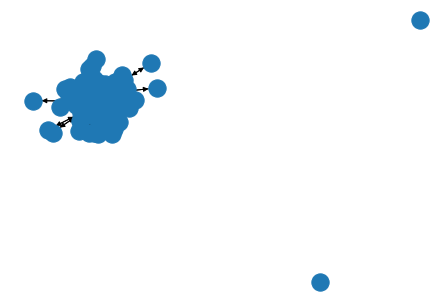

In [99]:
nx.draw(Beatles_nw)

### Extract GCC

In [100]:
Gs = list(Beatles_nw.subgraph(c).copy() for c in nx.weakly_connected_components(Beatles_nw))
biggest = 0
GCC_index = 0
for index,graph in enumerate(Gs):
    if len(graph.nodes) > biggest:
        biggest = len(graph.nodes)
        GCC_index = index
GCC = Gs[GCC_index]

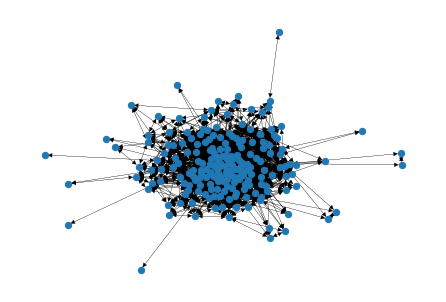

In [101]:
options = {
    'node_size': 40,
    'width': 0.2,
}
nx.draw(GCC,**options)

#### Convert to undirected network

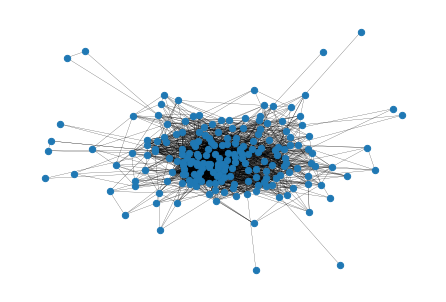

In [102]:
un_Beatles_nw= GCC.to_undirected()

options = {
    'node_size': 40,
    'width': 0.2,
}
nx.draw(un_Beatles_nw,**options)

Still needs to be define a criteria to link two songs. Right now the criteria is that if between the most 5 common words one is present in both songs, these songs are linked.

In [127]:
Sorted_degree=dict(sorted(un_Beatles_nw.degree, key=lambda x: x[1], reverse=True))
Sorted_degree

{'love-me-do': 76,
 'my-life': 75,
 'means-lot': 73,
 'do-you-want-know-secret': 72,
 'ask-me-why': 71,
 'dreamers-do': 70,
 'here-there-and-everywhere': 69,
 'i-feel-fine': 69,
 'i-dont-want-spoil-party': 68,
 'i-should-have-known-better': 67,
 'i-will': 67,
 'shes-woman': 64,
 'she-loves-you': 62,
 'you-know-what-do': 61,
 'end': 61,
 'old-brown-shoe': 61,
 'no-one': 60,
 'dont-pass-me': 60,
 'youve-got-hide-your-love-away': 59,
 'cant-buy-me-love': 59,
 'thank-you-girl': 58,
 'things-we-said-today': 57,
 'within-you-without-you': 57,
 'all-you-need-love': 55,
 'long-long-long': 54,
 'love-you': 54,
 'real-love': 54,
 'if-i-fell': 53,
 'you-blue': 53,
 'ps-i-love-you': 53,
 'not-second-time': 52,
 'ill-be-back': 52,
 'boy': 52,
 'its-only-love': 51,
 'step-inside-love-los-paranoias': 51,
 'its-all-too-much': 49,
 'if-i-needed-someone': 49,
 'word': 48,
 'and-i-love-her': 48,
 'something': 47,
 'please-please-me': 47,
 'she-said-she-said': 47,
 'dont-let-me-down': 46,
 'i-call-your-na

In [104]:
d_top5['dont-pass-me']

['make', 'love', 'see', 'pass', 'cry']

In [105]:
d_top5['love-me-do']

['love', 'know', 'ill', 'always', 'true']

In [106]:
d_top5['i-feel-fine']

['know', 'said', 'love', 'feel', 'fine']

In [107]:
d_top5['yellow-submarine']

['yellow', 'submarine', 'live', 'sea', 'lived']

#### Plot degree distribution

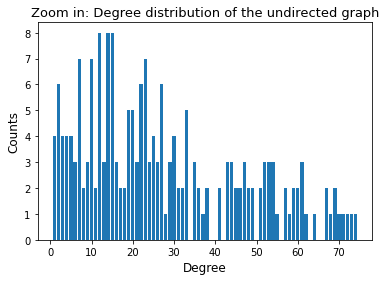

In [131]:
import matplotlib.pyplot as plt
import numpy as np
#FROM UNDIRECTED TO DIRECTED GRAPH:
un_Beatles_nw= GCC.to_undirected()
all_degrees=[]

#Obtenition of degree 
for deg in un_Beatles_nw.degree():
    all_degrees.append(deg[1])
    
#Zoom in
v = np.arange(int(min(all_degrees)),max(Sorted_degree.values()))
count,bins=np.histogram(all_degrees,bins=v)
plt.bar(bins[:-1], count)
plt.title('Zoom in: Degree distribution of the undirected graph',fontsize=13)
plt.xlabel('Degree',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.show() 

## Find communities

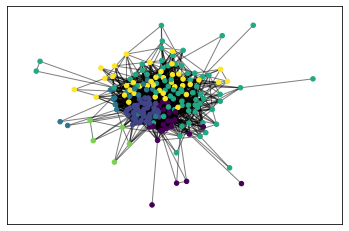

In [132]:
import community.community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

# compute the best partition
partition = community.community_louvain.best_partition(un_Beatles_nw)

# draw the graph
pos = nx.spring_layout(un_Beatles_nw)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(un_Beatles_nw, pos, partition.keys(), node_size=20,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(un_Beatles_nw, pos, alpha=0.5)
plt.show()

In [133]:
print('Number of communities found: ', len(np.unique(list(partition.values()))))

Number of communities found:  6


In [135]:
print('Modularity:', np.round(community.community_louvain.modularity(partition,un_Beatles_nw),4))

Modularity: 0.3224


In [138]:
# we compute the number of characters in every community in order to find the top 5
communities_d=dict.fromkeys(list(range(0,len(np.unique(list(partition.values()))))))
for i in range(0,len(np.unique(list(partition.values())))):
    l=[]
    for el in partition:
        if partition[el]==i:
            l.append(el)
    communities_d[i]=l
    
size_communities=[len(x) for x in communities_d.values()]

size_communities

[26, 43, 17, 70, 5, 40]

Extract the most common words for each community

In [167]:
communities_d[4]

['strawberry-fields-forever',
 'let-it-be',
 'hey-jude',
 'hey-bulldog',
 'continuing-story-bungalow-bill']

Most common words in each community (counting the time each word appears)

In [166]:
for idx in communities_d:
    community_words=[]
    for el in communities_d[idx]:
        path='lyrics_songs/'+el+'.txt'
        clean=clean_lyrics(path)
        for word in clean:
            community_words.append(word)
    print(FreqDist(community_words).most_common(5))

[('know', 182), ('say', 53), ('name', 42), ('hello', 33), ('hand', 26)]
[('love', 348), ('know', 78), ('cant', 47), ('need', 45), ('say', 44)]
[('see', 74), ('ooh', 35), ('time', 32), ('better', 32), ('goo', 21)]
[('got', 95), ('baby', 86), ('girl', 84), ('come', 75), ('home', 61)]
[('let', 38), ('hey', 19), ('bill', 17), ('bungalow', 16), ('strawberry', 13)]
[('yeah', 128), ('ill', 81), ('want', 72), ('long', 48), ('well', 42)]


Most common words in each community (counting the number of song a word appear)

In [173]:
for idx in communities_d:
    community_words=[]
    for el in communities_d[idx]:
        path='lyrics_songs/'+el+'.txt'
        clean=clean_lyrics(path)
        unique=list(np.unique(clean))
        for word in unique:
            community_words.append(word)
    print('size:' ,size_communities[idx])
    print(FreqDist(community_words).most_common(5))

size: 26
[('know', 20), ('like', 9), ('man', 8), ('say', 7), ('yes', 7)]
size: 43
[('love', 43), ('know', 27), ('see', 18), ('want', 15), ('say', 13)]
size: 17
[('see', 14), ('get', 8), ('time', 8), ('day', 7), ('never', 7)]
size: 70
[('know', 24), ('got', 23), ('time', 22), ('way', 20), ('love', 20)]
size: 5
[('know', 3), ('let', 3), ('right', 3), ('hey', 3), ('always', 2)]
size: 40
[('ill', 18), ('want', 17), ('know', 15), ('like', 15), ('see', 13)]


### Feature: most common words of a given community (times a song contains a word)

In [184]:
def community_words(community):
    community_words=[]
    for el in community:
        path='lyrics_songs/'+el+'.txt'
        clean=clean_lyrics(path)
        unique=list(np.unique(clean))
        for word in unique:
            community_words.append(word)
    return FreqDist(community_words).most_common(5)

community_words(communities_d[0])

[('know', 20), ('like', 9), ('man', 8), ('say', 7), ('yes', 7)]

### Feature: introduce a famous song and find in which community it belongs

In [185]:
def song_community(song):
    i=0
    for idx in communities_d:
        if song in communities_d[i]:
            return i
        i+=1
        
song_community('let-it-be')

4

In [186]:
community_words(communities_d[song_community('let-it-be')])

[('know', 3), ('let', 3), ('right', 3), ('hey', 3), ('always', 2)]

## VADER sentimental analysis

In [187]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
sentenceDic = {}
for name in dialogues:
    sentenceDic[name] = []
    for line in dialogues[name]:
        sentence = re.split(r'[.!?]+ *',line)
        sentenceDic[name].extend(sentence)

In [194]:
file=open('lyrics_songs/youll-be-mine.txt').read()
file

"Well darling all the night  You'll be mine and I know  You'll be mine until you die  You'll be mine   And so  (And so)  All the night  (All the night)  You'll be mine  (You'll be mine)  You'll be mine  And the stars  (And the stars)  Always shine  (Always shine)  You'll be mine   My darling, when you brought me  That toast the other morning  I, I looked into your eyes  And I could see a nice little healthy eyeball  And I loved you like I never done  Like I've never done before!   And the stars  (And the stars)  Always shine  (Always shine)  And you'll be mine  [Incomprehensible] you'll be mine  You'll be mine  At the start  (At the start)  Oh yes, you'll be   "

In [221]:
sentences=[]
index=[(m.start(0), m.end(0)) for m in re.finditer('  ',file)]
for i in range(0,len(index)-1):
    a=file[index[i][1]:index[i+1][0]]
    sentences.append(a)

You'll be mine and I know.
You'll be mine until you die.
You'll be mine.
 And so.
(And so).
All the night.
(All the night).
You'll be mine.
(You'll be mine).
You'll be mine.
And the stars.
(And the stars).
Always shine.
(Always shine).
You'll be mine.
 My darling, when you brought me.
That toast the other morning.
I, I looked into your eyes.
And I could see a nice little healthy eyeball.
And I loved you like I never done.
Like I've never done before!.
 And the stars.
(And the stars).
Always shine.
(Always shine).
And you'll be mine.
[Incomprehensible] you'll be mine.
You'll be mine.
At the start.
(At the start).
Oh yes, you'll be.


In [227]:
vs['compound']

{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.4019}

In [238]:
def song_Vader(song):
    # extract sentence of each song
    sentences=[]
    index=[(m.start(0), m.end(0)) for m in re.finditer('  ',file)]
    for i in range(0,len(index)-1):
        a=file[index[i][1]:index[i+1][0]]
        sentences.append(a)
    # compute sentiment analysis for sentence
    analyzer = SentimentIntensityAnalyzer()
    compound1=[]
    compound2=[]
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        # take every sentence value (more robust)
        compound1.append(vs['compound'])
        # take just the sentences that are not neutral
        if vs['compound']!=0:
            compound2.append(vs['compound'])
        # print("{:-<65} {}".format(sentence, str(vs)))
    return np.mean(compound1),np.mean(compound2)

song_Vader('youll-be-mine')[0]

0.07086129032258064

In [241]:
for idx in communities_d:
    compound1=[]
    compound2=[]
    for el in communities_d[idx]:
        print(compound1.append(song_Vader(el)[0]))
        compound2.append(song_Vader(el)[1])
    print(np.mean(compound1))

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
0.07086129032258064
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
0.07086129032258062
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
0.07086129032258064
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
0.07086129032258066
None
None
None
None
None
0.07086129032258064
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [ ]:
sentenceDic = {}
for name in dialogues:
    sentenceDic[name] = []
    for line in dialogues[name]:
        sentence = re.split(r'[.!?]+ *',line)
        sentenceDic[name].extend(sentence)

In [223]:
def sentiment_score_VADER(sentence):
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict['compound']

In [224]:
sentiment_score_VADER('Oh yes, you\'ll be.')

NameError: name 'sid_obj' is not defined

In [237]:
for idx in communities_d:
    for el in communities_d[idx]:
        

0
1
2
3
4
5
